## Classifying Diabetes

## Objective

The task of this project is to fit a model to try and predict which people are at risk or already have Type-II Diabetes. The dataset is a collection of biometric data from a medical study on heart disease, provided by Vanderbilt University: Department of Biostatistics. 

###### The info for this Dataset can be found [here:](http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/diabetes.html)
###### Specific feature info can be found [here:](http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/Cdiabetes.html)

In [1]:
# Import all relevant libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

###### The data can be downloaded with the url defined below, in the code blocks.

In [2]:
url = 'http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/diabetes.csv'
df = pd.read_csv(url, sep = ',')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 19 columns):
id          403 non-null int64
chol        402 non-null float64
stab.glu    403 non-null int64
hdl         402 non-null float64
ratio       402 non-null float64
glyhb       390 non-null float64
location    403 non-null object
age         403 non-null int64
gender      403 non-null object
height      398 non-null float64
weight      402 non-null float64
frame       391 non-null object
bp.1s       398 non-null float64
bp.1d       398 non-null float64
bp.2s       141 non-null float64
bp.2d       141 non-null float64
waist       401 non-null float64
hip         401 non-null float64
time.ppn    400 non-null float64
dtypes: float64(13), int64(3), object(3)
memory usage: 59.9+ KB


 This Dataset has 403 observations and 19 variables, maximum # NAs is 262. It may be necessary to explore the NaNs since there's a significant amount. There are also three object-type(categorical) features; rest of the dataset is numerical.

### Observe the features


In [4]:
df.head()

,id,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,frame,bp.1s,bp.1d,bp.2s,bp.2d,waist,hip,time.ppn
0,1000,203.0,82,56.0,3.6,4.31,Buckingham,46,female,62.0,121.0,medium,118.0,59.0,NaN,NaN,29.0,38.0,720.0
1,1001,165.0,97,24.0,6.9,4.44,Buckingham,29,female,64.0,218.0,large,112.0,68.0,NaN,NaN,46.0,48.0,360.0
2,1002,228.0,92,37.0,6.2,4.64,Buckingham,58,female,61.0,256.0,large,190.0,92.0,185.0,92.0,49.0,57.0,180.0
3,1003,78.0,93,12.0,6.5,4.63,Buckingham,67,male,67.0,119.0,large,110.0,50.0,NaN,NaN,33.0,38.0,480.0
4,1005,249.0,90,28.0,8.9,7.72,Buckingham,64,male,68.0,183.0,medium,138.0,80.0,NaN,NaN,44.0,41.0,300.0


In [5]:
df.tail()

,id,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,frame,bp.1s,bp.1d,bp.2s,bp.2d,waist,hip,time.ppn
398,41506,296.0,369,46.0,6.4,16.110001,Louisa,53,male,69.0,173.0,medium,138.0,94.0,130.0,94.0,35.0,39.0,210.0
399,41507,284.0,89,54.0,5.3,4.390000,Louisa,51,female,63.0,154.0,medium,140.0,100.0,146.0,102.0,32.0,43.0,180.0
400,41510,194.0,269,38.0,5.1,13.630000,Louisa,29,female,69.0,167.0,small,120.0,70.0,NaN,NaN,33.0,40.0,20.0
401,41752,199.0,76,52.0,3.8,4.490000,Louisa,41,female,63.0,197.0,medium,120.0,78.0,NaN,NaN,41.0,48.0,255.0
402,41756,159.0,88,79.0,2.0,NaN,Louisa,68,female,64.0,220.0,medium,100.0,72.0,NaN,NaN,49.0,58.0,900.0


 The features bp.2s and bp.2d seem to have a lot of NaNs. Below is a visualization of all the features and their approximate NaN values labeled as bands.

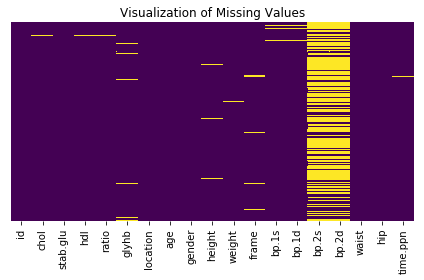

In [6]:
# Visualizing the null values
sns.heatmap(df.isnull(), yticklabels = False, cbar= False, cmap = 'viridis')
plt.title('Visualization of Missing Values')
plt.tight_layout()
plt.show()

From the plot above, we can see that the second systolic and disystolic blood pressure columns have too many missing
values and therefore should be dropped.

The following code will drop the two second blood pressure columns, as well as time.ppn and hip and waist because 
the ratio variable contains information from both hip and waste, i.e ratio = hip/waist, the frame column also seems to be a simmilar metric to ratio, essientially another size measurement.

In [7]:
# Drop columns not needed
df.drop(columns = ['id','bp.2s','bp.2d','time.ppn', 'hip', 'waist', 'frame'], inplace = True)
df.dropna(subset=['glyhb'], axis=0, inplace=True)

The missing rows for glyhb should also be dropped because it will be the output for the ML model later on.


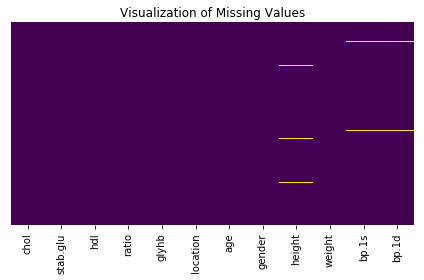

In [8]:
# Visualizing Null values again
sns.heatmap(df.isnull(), yticklabels = False, cbar= False, cmap = 'viridis')
plt.title('Visualization of Missing Values')
plt.tight_layout()
plt.show()

### Explore the Height and blood pressure (bp.1s,bp.1d) features

In [9]:
df[df['height'].isna()]

,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,bp.1s,bp.1d
63,145.0,85,29.0,5.0,3.99,Buckingham,38,female,NaN,125.0,NaN,NaN
86,218.0,182,54.0,4.0,10.55,Louisa,51,female,NaN,215.0,139.0,69.0
195,173.0,83,37.0,4.7,4.31,Buckingham,40,female,NaN,130.0,122.0,76.0
231,214.0,87,35.0,6.1,5.38,Buckingham,44,female,NaN,190.0,140.0,75.0
317,300.0,65,59.0,5.1,4.56,Louisa,34,female,NaN,160.0,120.0,60.0


It seems that among all the people with missing heights, they all are female.

Text(0.5,1,'Glycosylated Hemoglobin vs Height')

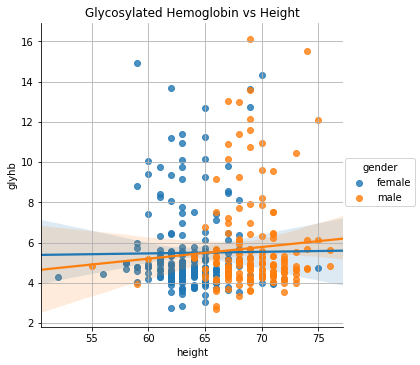

In [10]:
# Some visualizations for the height and gender features

plt.figure(figsize=(15,5))
sns.lmplot(x="height", y="glyhb", hue="gender", data=df)
plt.grid()
plt.title('Glycosylated Hemoglobin vs Height')


It seems from the plot above that males have a more positive linear association with glyhb, compared to females, in terms of height. Notice also that in relation to glyhb, the heights seem to have a clear dispersion around 65cm due to gender. Males have more height and positive linear association in relation to glycosylated hemoglobin(glyhb). The relationship between height and gender can be seen below, with a violin plot.

Text(0.5,1,'Height vs Gender')

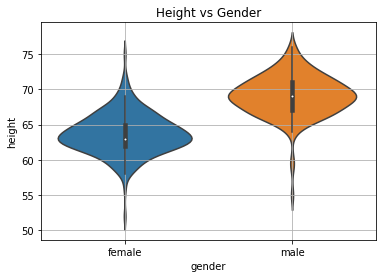

In [11]:
sns.violinplot(y ='height', x = 'gender',data = df, split=True )
plt.grid()
plt.title('Height vs Gender')


It may be a good idea to impute the missing NaNs in height using the gender column information since, as shown, all the people in question are female.

### Imputing for the Height Nan's

In [12]:
# Lets see the mean height by gender with a groupby statement
df.groupby(['gender'])['height'].mean()

gender
female    63.721973
male      69.098765
Name: height, dtype: float64

In [13]:
df.groupby(['gender'])['height'].std()

gender
female    2.876405
male      2.915390
Name: height, dtype: float64

 From the groupby statements and plots, there seems to be a clear distinction among the heights in relation to the gender. The cutoff seems to be 65 and the average for females seem to be 63 +/- 2. Since all the people with missing heights are female, 63 may be the best value for imputation.

In [14]:
# Impute 63 for the missing heights
df.fillna(value={'height': 63}, inplace=True)

In [15]:
# Remove all the rest of the NaN rows left; there should not be many left.
df.dropna(axis = 0, inplace=True)

In [16]:
# Check the updated data frame for consistent row amount, all the rows seem to be 383.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383 entries, 0 to 401
Data columns (total 12 columns):
chol        383 non-null float64
stab.glu    383 non-null int64
hdl         383 non-null float64
ratio       383 non-null float64
glyhb       383 non-null float64
location    383 non-null object
age         383 non-null int64
gender      383 non-null object
height      383 non-null float64
weight      383 non-null float64
bp.1s       383 non-null float64
bp.1d       383 non-null float64
dtypes: float64(8), int64(2), object(2)
memory usage: 38.9+ KB


In [17]:
# How much info was lost in terms of original data row amount?
383/403

0.9503722084367245

In [18]:
(402 - 262)/402 

0.3482587064676617

After dropping the unecessary columns and inputing for height and deleting the NaN rows left over, the data lost about 5 percent of information, which isn't bad because the max nan rows were 262. If the dropna method was called in the beginning instead of explorind, dropping columns, and imputing then about 35% of the data would have been lost instead of just 5%. 

##### Notice all the features have 383 non-null observations. The last thing to do is to change the dtypes for the objects to categorical to free up some memory.

In [19]:
# convert object columns to catagorical for mone efficient memory storage
df.location = df.location.astype('category')
df.gender = df.gender.astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383 entries, 0 to 401
Data columns (total 12 columns):
chol        383 non-null float64
stab.glu    383 non-null int64
hdl         383 non-null float64
ratio       383 non-null float64
glyhb       383 non-null float64
location    383 non-null category
age         383 non-null int64
gender      383 non-null category
height      383 non-null float64
weight      383 non-null float64
bp.1s       383 non-null float64
bp.1d       383 non-null float64
dtypes: category(2), float64(8), int64(2)
memory usage: 33.8 KB


 Now the memory usage is 33.8 KB instead of 38.9+ KB as before. Next the categorical features will be one-hot-encoded in prparation for the ML models, and the output feature 'glyhb' also needs some processing.

In [20]:
cat = ['location','gender']
df = pd.get_dummies(df,columns=cat) # One Hot Encoding for categorical features

In [21]:
# We need to change the glyhb feature from continuous to binary, and categorical
def is_diabetes(x):
    if x < 7:
        return 0
    else:
        return 1
df['diabetes'] = df['glyhb'].apply(is_diabetes)
df.head()

,chol,stab.glu,hdl,ratio,glyhb,age,height,weight,bp.1s,bp.1d,location_Buckingham,location_Louisa,gender_female,gender_male,diabetes
0,203.0,82,56.0,3.6,4.31,46,62.0,121.0,118.0,59.0,1,0,1,0,0
1,165.0,97,24.0,6.9,4.44,29,64.0,218.0,112.0,68.0,1,0,1,0,0
2,228.0,92,37.0,6.2,4.64,58,61.0,256.0,190.0,92.0,1,0,1,0,0
3,78.0,93,12.0,6.5,4.63,67,67.0,119.0,110.0,50.0,1,0,0,1,0
4,249.0,90,28.0,8.9,7.72,64,68.0,183.0,138.0,80.0,1,0,0,1,1


In [22]:
df['diabetes'].value_counts()

0    324
1     59
Name: diabetes, dtype: int64

#### The Data is now ready for model fitting using sklearn

## Fitting a model for a baseline prediction

In [23]:
# import all the libraries needed

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, confusion_matrix
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [24]:
df.head()

,chol,stab.glu,hdl,ratio,glyhb,age,height,weight,bp.1s,bp.1d,location_Buckingham,location_Louisa,gender_female,gender_male,diabetes
0,203.0,82,56.0,3.6,4.31,46,62.0,121.0,118.0,59.0,1,0,1,0,0
1,165.0,97,24.0,6.9,4.44,29,64.0,218.0,112.0,68.0,1,0,1,0,0
2,228.0,92,37.0,6.2,4.64,58,61.0,256.0,190.0,92.0,1,0,1,0,0
3,78.0,93,12.0,6.5,4.63,67,67.0,119.0,110.0,50.0,1,0,0,1,0
4,249.0,90,28.0,8.9,7.72,64,68.0,183.0,138.0,80.0,1,0,0,1,1


In [25]:
# Define X and y
X = df.drop(['glyhb','diabetes'], axis=1)
y = df['diabetes']

In [26]:
# Train-test split the data and stratify on y labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state= 123)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(y_test.value_counts())

(287, 13) (287,)
(96, 13) (96,)
0    83
1    13
Name: diabetes, dtype: int64


In [27]:
# Instantiate the LogisticRegression baseline model
lr = LogisticRegression(penalty='l1', class_weight='balanced')

In [28]:
# fit the model
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [29]:
# predict raw lables and also the probabilities 
lr_pred = lr.predict(X_test)
lr_pred_train = lr.predict(X_train)
lr_proba =lr.predict_proba(X_test)[:,1]
lr_proba_train = lr.predict_proba(X_train)[:,1]


In [30]:
# Check the performance to get some baseline result to work with
print(confusion_matrix(y_test,lr_pred))
print(classification_report(y_test,lr_pred))
print('Accuracy on train: ',accuracy_score(y_train,lr_pred_train))
print('Accuracy on test: ',accuracy_score(y_test,lr_pred))

print('ROC-AUC on train: ', roc_auc_score(y_train,lr_proba_train))
print('ROC-AUC on test: ', roc_auc_score(y_test,lr_proba))

[[69 14]
 [ 3 10]]
             precision    recall  f1-score   support

          0       0.96      0.83      0.89        83
          1       0.42      0.77      0.54        13

avg / total       0.88      0.82      0.84        96

Accuracy on train:  0.8850174216027874
Accuracy on test:  0.8229166666666666
ROC-AUC on train:  0.9576943893198628
ROC-AUC on test:  0.8850787766450416


### Compare with Random Forest Classifier

In [31]:
rf = RandomForestClassifier(max_depth=4, min_samples_split=3, n_estimators=200, class_weight='balanced')

In [32]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=4, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=3, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [33]:
# predict raw lables and also the probabilities 
rf_pred = rf.predict(X_test)
rf_pred_train = rf.predict(X_train)
rf_proba =rf.predict_proba(X_test)[:,1]
rf_proba_train = rf.predict_proba(X_train)[:,1]


In [34]:
# Check the performance to get some baseline result to work with
print(confusion_matrix(y_test,rf_pred))
print(classification_report(y_test,rf_pred))
print('Accuracy on train: ',accuracy_score(y_train,rf_pred_train))
print('Accuracy on test: ',accuracy_score(y_test,rf_pred))

print('ROC-AUC on train: ', roc_auc_score(y_train,rf_proba_train))
print('ROC-AUC on test: ', roc_auc_score(y_test,rf_proba))

[[77  6]
 [ 3 10]]
             precision    recall  f1-score   support

          0       0.96      0.93      0.94        83
          1       0.62      0.77      0.69        13

avg / total       0.92      0.91      0.91        96

Accuracy on train:  0.9581881533101045
Accuracy on test:  0.90625
ROC-AUC on train:  0.9938661374706838
ROC-AUC on test:  0.8962001853568119


## Understanding baseline model outputs

Both the logistic regression and random forest models perform similarly in terms of roc-auc score however, the problem with this dataset is that it is imbalanced as seen above by looking at the precision/recall scores and the f1 score, as well as by looking at the supports of the labels. Also something else to consider is that there are a lot of features and some may not be needed,so another thing to do would be to select the most predictive features.

The imbalance problem can be lessened with stratified train-test-split and passing the 'balanced' string for the class_weights parameter in the logistic regression model.

As for feature selection, forward step-wise feature selection based on the auc metric can be used to select the most predictive features. 

First lets see the feature importances which can be collected from the random forest model, this enables some selection right away as well. 

### Visualizing Random Forest Feature Importances

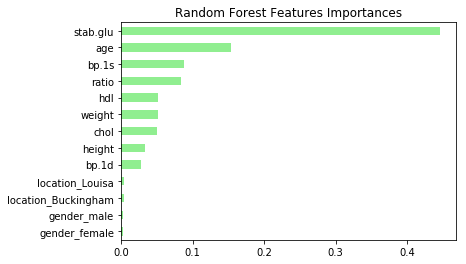

gender_female          0.002564
gender_male            0.003157
location_Buckingham    0.003620
location_Louisa        0.004516
bp.1d                  0.028290
height                 0.033232
chol                   0.050373
weight                 0.050996
hdl                    0.051450
ratio                  0.084192
bp.1s                  0.088425
age                    0.153105
stab.glu               0.446079
dtype: float64


In [35]:
# Extract the feature importances from the rf_model
importances = pd.Series(data=rf.feature_importances_,
                        index= X_train.columns)

# Sort the feature importances
importances_sorted = importances.sort_values()

# Plot the importances
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Random Forest Features Importances')
plt.show()
print(importances_sorted)

The location and gender features provide the least amount of information based on the outputed barplot 
above so dropping these two first would make sense.

In [36]:
# The location and gender features will be dropped

df.drop(['location_Buckingham','location_Louisa', 'gender_female', 'gender_male'], axis = 1, inplace=True)

## Feature Engineering for Hypertension and Obesity

The features bp.1s and bp.1d are respectively the systolic and diasystolic blood pressures measured in mmHg. The normal range for healty individuals is 120/80 or also known as "120 over 80 BP". If either the numerator or denominator values are higher than these two values respectively, then that person is usually diagnosed with "High BP". A new feature can be engineered from these two features which essentialy indicate if a person has high/low BP. 

In [37]:
df.rename(columns={'bp.1s':'systolic','bp.1d':'diasystolic'}, inplace = True)
def isBP_high(cols):
    systolic = cols[0]
    diasystolic = cols[1]
    if systolic >= 130.0 and diasystolic > 80: # condition for Stage-1 Hypertension(High BP)
        return 1
    else:
        return 0
# Define a new binary feature for BP
df['hypertension'] = df.rename(columns={'bp.1s':'systolic','bp.1d':'diasystolic'})[['systolic','diasystolic']].apply(isBP_high, axis=1)
#df.drop(['systolic','diasystolic'], axis=1, inplace=True)

In [38]:
df.drop(['systolic','diasystolic'], axis=1, inplace=True) # Don't need bp.1s, bp.1d.
df.head()

,chol,stab.glu,hdl,ratio,glyhb,age,height,weight,diabetes,hypertension
0,203.0,82,56.0,3.6,4.31,46,62.0,121.0,0,0
1,165.0,97,24.0,6.9,4.44,29,64.0,218.0,0,0
2,228.0,92,37.0,6.2,4.64,58,61.0,256.0,0,1
3,78.0,93,12.0,6.5,4.63,67,67.0,119.0,0,0
4,249.0,90,28.0,8.9,7.72,64,68.0,183.0,1,0


In [39]:
# Define the feature for BMI index, or obesity 
df['bmi'] = round((df['height']**2)/df['weight'],2)
def is_obese(bmi):
    if bmi > 29.9:
        return 1
    else:
        return 0
df['obese'] = df['bmi'].apply(is_obese)
    

In [40]:
df.head()

,chol,stab.glu,hdl,ratio,glyhb,age,height,weight,diabetes,hypertension,bmi,obese
0,203.0,82,56.0,3.6,4.31,46,62.0,121.0,0,0,31.77,1
1,165.0,97,24.0,6.9,4.44,29,64.0,218.0,0,0,18.79,0
2,228.0,92,37.0,6.2,4.64,58,61.0,256.0,0,1,14.54,0
3,78.0,93,12.0,6.5,4.63,67,67.0,119.0,0,0,37.72,1
4,249.0,90,28.0,8.9,7.72,64,68.0,183.0,1,0,25.27,0


In [41]:
df.columns.values

array(['chol', 'stab.glu', 'hdl', 'ratio', 'glyhb', 'age', 'height',
       'weight', 'diabetes', 'hypertension', 'bmi', 'obese'], dtype=object)

### Testing the new engineered features: bmi, obesity and hypertension

In [42]:
# Define new X and Y for fitting logistic regression
X = df.drop(['glyhb','diabetes','height','weight','bmi'], axis=1)
y = df['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state= 123)


In [43]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [44]:
# predict raw lables and also the probabilities 
lr_pred = lr.predict(X_test)
lr_pred_train = lr.predict(X_train)
lr_proba =lr.predict_proba(X_test)[:,1]
lr_proba_train = lr.predict_proba(X_train)[:,1]


In [45]:
# Check the performance to get some baseline result to work with
print(confusion_matrix(y_test,lr_pred))
print(classification_report(y_test,lr_pred))
print('Accuracy on train: ',accuracy_score(y_train,lr_pred_train))
print('Accuracy on test: ',accuracy_score(y_test,lr_pred))

print('ROC-AUC on train: ', roc_auc_score(y_train,lr_proba_train))
print('ROC-AUC on test: ', roc_auc_score(y_test,lr_proba))

[[72 11]
 [ 3 10]]
             precision    recall  f1-score   support

          0       0.96      0.87      0.91        83
          1       0.48      0.77      0.59        13

avg / total       0.89      0.85      0.87        96

Accuracy on train:  0.8989547038327527
Accuracy on test:  0.8541666666666666
ROC-AUC on train:  0.9601298935594443
ROC-AUC on test:  0.881371640407785


## Feature Selection

First the following functions have to be defined in order to run the step-wiss forward feature selection procedure.

In [46]:
# First define a function to compute the ROC-AUC score metric
def auc(variables, target, basetable):
    X = basetable[variables]
    Y = basetable[target]
    
    logreg = LogisticRegression(penalty='l1', class_weight='balanced')
    logreg.fit(X, Y)
    
    predictions = logreg.predict_proba(X)[:,1]
    auc = roc_auc_score(Y, predictions)
    return(auc)
        
    
# Second compute the next best feature which would give a higher AUC score

def next_best(current_variables,candidate_variables, target, basetable):
    best_auc = -1
    best_variable = None
    for v in candidate_variables:
        auc_v = auc(current_variables + [v], target, basetable)
        if auc_v >= best_auc:
            best_auc = auc_v
            best_variable = v
    return best_variable



In [47]:
# Define the initial data to pass into the next_best function 
target = ['diabetes']
candidate_variables = list(X.columns.values)

print(candidate_variables)

['chol', 'stab.glu', 'hdl', 'ratio', 'age', 'hypertension', 'obese']


The following block of code will compute the best order to add features in.

In [48]:
current_variables = []
max_number_variables = 7
number_iterations = min(max_number_variables, len(candidate_variables))
for i in range(0,number_iterations):
    next_variable = next_best(current_variables,candidate_variables,target,df)
    current_variables = current_variables + [next_variable]
    candidate_variables.remove(next_variable)
print(current_variables)

['stab.glu', 'age', 'obese', 'ratio', 'chol', 'hypertension', 'hdl']


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [49]:
# Define a function to compute auc of stepwise additions for both train and test sets.
def auc_train_test(feature,target,train,test):
    X_train = train[feature]
    X_test = test[feature]
    Y_train = train[target]
    Y_test = test[target]
    
    lr = LogisticRegression()
    lr.fit(X_train,Y_train)
    
    pred_train = lr.predict_proba(X_train)[:,1]
    pred_test = lr.predict_proba(X_test)[:,1] 
    
    auc_train = roc_auc_score(Y_train, pred_train)
    auc_test = roc_auc_score(Y_test, pred_test)
   
    return(auc_train, auc_test)

In [50]:
# Carry out partititioning with stratification on 60-40 split
X_train, X_test, Y_train, Y_test = train_test_split(X,y,stratify = y,test_size= 0.40, random_state= 123)

train = pd.concat([X_train, Y_train], axis=1)
test = pd.concat([X_test, Y_test], axis=1)
train.head()

,chol,stab.glu,hdl,ratio,age,hypertension,obese,diabetes
82,218.0,87,38.0,5.7,40,0,0,0
135,209.0,87,34.0,6.1,48,0,1,0
52,212.0,97,45.0,4.7,65,1,0,0
222,269.0,59,66.0,4.1,41,0,0,0
149,164.0,71,63.0,2.6,20,0,1,0


In [51]:
print(current_variables)

['stab.glu', 'age', 'obese', 'ratio', 'chol', 'hypertension', 'hdl']


### Visualizing the Performance of Stepwise Addition of Features Based on AUC Score

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


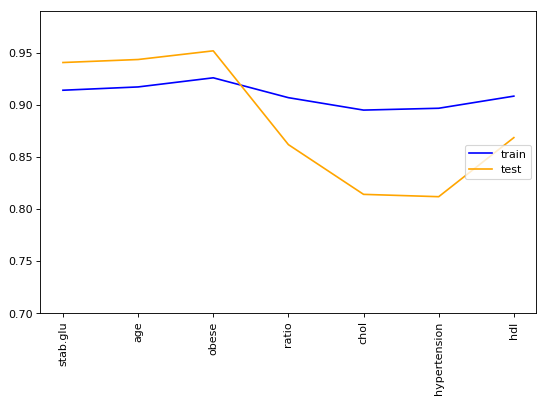

In [52]:
variables = current_variables
# Keep track of train and test AUC values
auc_values_train = []
auc_values_test = []

# Add variables one by one
variables_evaluate = []

# Iterate over the variables in variables
for v in variables:
    # Add the variable
    variables_evaluate.append(v)
    # Calculate the train and test AUC of this set of variables
    auc_train, auc_test = auc_train_test(variables_evaluate,['diabetes'],train,test)
    # Append the values to the lists
    auc_values_train.append(auc_train)
    auc_values_test.append(auc_test)
    
x = np.array(range(0,len(auc_values_train)))
y_train = np.array(auc_values_train)
y_test = np.array(auc_values_test)

fig=plt.figure(figsize=(8, 5), dpi= 80, facecolor='w', edgecolor='k')

plt.xticks(x, variables, rotation = 90)
plt.plot(x,y_train, color='blue', label = 'train')
plt.plot(x,y_test, color='orange', label='test')
plt.ylim((0.7, 0.99))
plt.legend(loc=5)
plt.figure(figsize=(18,16))
plt.show()

The best features seem to be stab.glu, age, and obese. The test curve drops after obese and train stays high,
indicating that the first three variables should be used. Particularly, it seems that Obese is a good feature to engineere for this problem.

In [53]:
auc_values_test

[0.9403846153846154,
 0.9432692307692309,
 0.9516025641025642,
 0.8615384615384615,
 0.8137820512820513,
 0.8115384615384615,
 0.8682692307692308]

In [54]:
X = df[['stab.glu', 'obese', 'age']]
y = df.diabetes
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify = y,test_size=0.25, random_state= 123)


In [55]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [56]:
# predict raw lables and also the probabilities 
lr_pred = lr.predict(X_test)
lr_pred_train = lr.predict(X_train)
lr_proba =lr.predict_proba(X_test)[:,1]
lr_proba_train = lr.predict_proba(X_train)[:,1]


In [57]:
# Check the performance compared to baseline result before forward stepwise feature selection was done
print(confusion_matrix(y_test,lr_pred))
print(classification_report(y_test,lr_pred))
print('Accuracy on train: ',accuracy_score(y_train,lr_pred_train))
print('Accuracy on test: ',accuracy_score(y_test,lr_pred))

print('ROC-AUC on train: ', roc_auc_score(y_train,lr_proba_train))
print('ROC-AUC on test: ', roc_auc_score(y_test,lr_proba))

[[78  3]
 [ 3 12]]
             precision    recall  f1-score   support

          0       0.96      0.96      0.96        81
          1       0.80      0.80      0.80        15

avg / total       0.94      0.94      0.94        96

Accuracy on train:  0.8989547038327527
Accuracy on test:  0.9375
ROC-AUC on train:  0.9385989524878414
ROC-AUC on test:  0.9596707818930041


The feature engineering and selection seems to have worked because compared to the baseline model the new model 
above has a roc-auc score of 0.95 as opposed to 0.89 which the baseline had.

## Checking robustness for the AUC-ROC and accuracy preformance with K-fold CV 

In [58]:
auc = [0.8]*2
acc = [0.8]*2
for i in range(2,16):
    results1 = cross_val_score(lr, X, y, cv=i, scoring= 'roc_auc')     
    results2 = cross_val_score(lr, X, y, cv=i, scoring= 'accuracy')

    auc.append(results1.mean())
    acc.append(results2.mean())



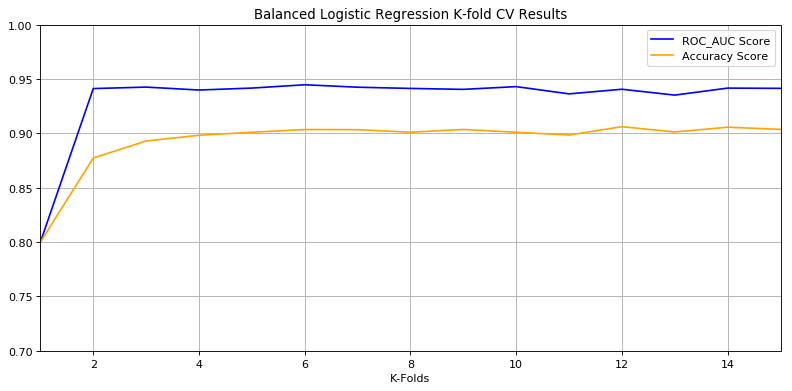

In [63]:
fig=plt.figure(figsize=(10, 5), dpi= 80, facecolor='w', edgecolor='k')

plt.xlim(1,len(range(1,16)))
plt.ylim(0.7,1)
plt.plot(auc, color='blue', label='ROC_AUC Score')
plt.plot(acc, color = 'orange', label='Accuracy Score')
plt.legend()
plt.xlabel('K-Folds')
plt.title('Balanced Logistic Regression K-fold CV Results')
plt.tight_layout()
plt.grid()
plt.figure(figsize=(8,8))


## Conclusion and Recap

It seems that the final logistic regression accuracy comes out to arount 90% and the final ROC-AUC comes out to be around 94%; even as the K-folds are increased these values don't seem to deviate much. 

To recap, the unbalancedness of the classes was handled by passing the 'balanced weights' parameter into the logistic regression model. 

We see further improvements after the stepwise selection procedure and confirm that the 'Obese' feature that was engineered was indeed a good predictive addition to the model. 